In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
from collections import Counter
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
from tqdm import tqdm
import requests
import tarfile

## the following code is used to download and extract the corpus
-- ⚠️ the files when extracted is around 500MB, and the download is around 250MB


In [3]:
# url = 'https://github.com/smc/corpus/archive/refs/heads/master.tar.gz'
# download_path = 'malayalam_corpus.tar.gz'
# extract_dir = './malayalam_corpus'

# response = requests.get(url, stream=True)
# response.raise_for_status()

# with open(download_path, 'wb') as file:
#     for chunk in response.iter_content(chunk_size=8192):
#         file.write(chunk)

# with tarfile.open(download_path, 'r:gz') as tar:
#     tar.extractall(path=extract_dir)

# os.remove(download_path)

# print(f'Corpus downloaded and extracted to {extract_dir}')

## Some quick analysis

100%|██████████| 29/29 [00:00<00:00, 1305.30it/s]


Total characters: 1,679,841
Total words: 160,335
Unique characters: 171
'്': 217,602
' ': 141,780
'ി': 104,381
'ക': 98,235
'ന': 90,282
'ു': 81,854
'ത': 77,799
'ാ': 65,519
'യ': 54,455
'ര': 49,918
'ട': 45,656
'പ': 45,402
'മ': 38,208
'വ': 37,932
'ം': 35,208
'െ': 32,617
'ല': 29,665
'സ': 29,491
'റ': 25,200
'ണ': 22,226
'മുഖ്യമന്ത്രി': 1,380
'ഒരു': 1,209
'ഈ': 1,151
'സർക്കാർ': 753
'ആ': 558
'പറഞ്ഞു.': 531
'പിണറായി': 475
'എന്ന': 465
'കോടി': 449
'വിജയൻ': 368
'എല്ലാ': 362
'തന്നെ': 361
'കൂടുതൽ': 341
'നിന്നും': 297
'രൂപ': 287
'കേരള': 274
'മുതൽ': 266
'നിന്ന്': 265
'എന്നു': 262
'വലിയ': 254


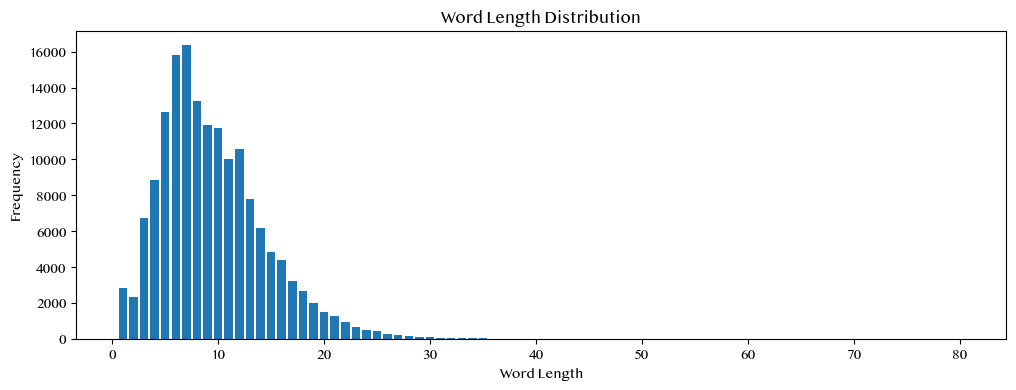

Total number of text files: 29
Average file size: 155.90 KB


In [6]:
corpus_dir = Path('./malayalam_corpus/corpus-master/text')

def read_all_texts(directory):
    all_text = []
    for file_path in tqdm(list(directory.glob('**/*.txt'))):
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read()
                all_text.append(text)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    return ' '.join(all_text)

full_text = read_all_texts(corpus_dir)

total_chars = len(full_text)
total_words = len(full_text.split())
unique_chars = len(set(full_text))

print(f"Total characters: {total_chars:,}")
print(f"Total words: {total_words:,}")
print(f"Unique characters: {unique_chars}")

char_freq = Counter(full_text)
for char, count in char_freq.most_common(20):
    print(f"'{char}': {count:,}")

words = full_text.split()
word_freq = Counter(words)
for word, count in word_freq.most_common(20):
    print(f"'{word}': {count:,}")

word_lengths = [len(word) for word in words]
length_freq = Counter(word_lengths)

plt.figure(figsize=(12, 4))
lengths, freqs = zip(*sorted(length_freq.items()))
plt.bar(lengths, freqs)
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

total_files = len(list(corpus_dir.glob('**/*.txt')))
print(f"Total number of text files: {total_files}")

file_sizes = [os.path.getsize(f) for f in corpus_dir.glob('**/*.txt')]
avg_file_size = sum(file_sizes) / len(file_sizes)
print(f"Average file size: {avg_file_size/1024:.2f} KB")

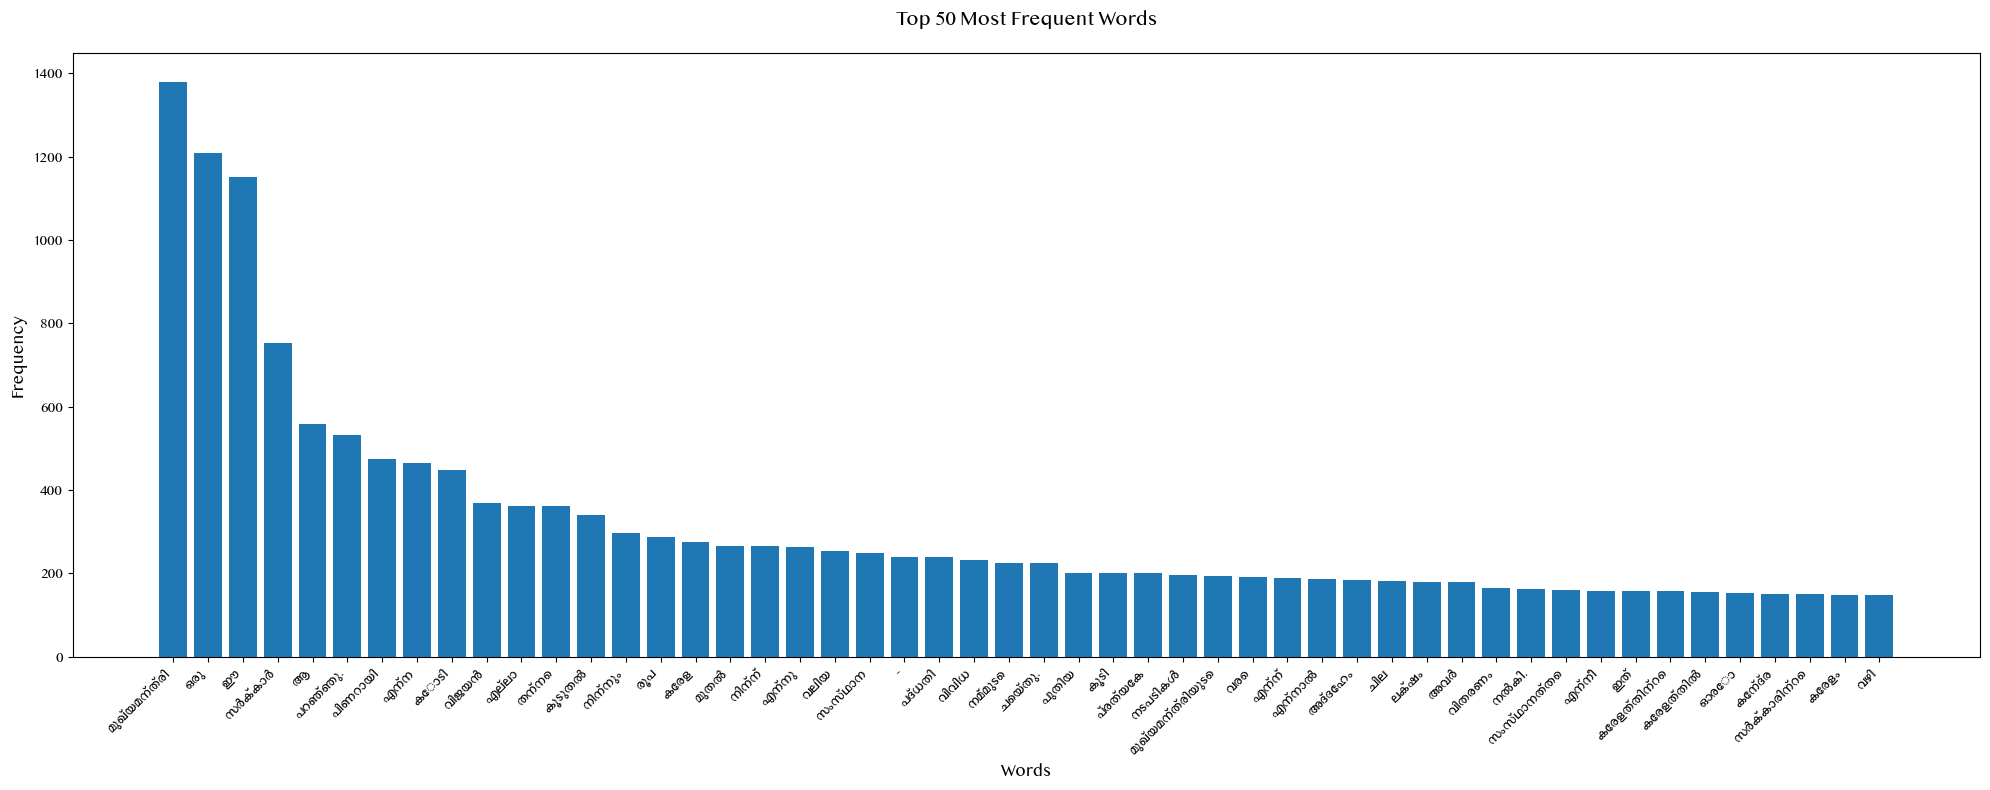

മുഖ്യമന്ത്രി: 1380
ഒരു: 1209
ഈ: 1151
സർക്കാർ: 753
ആ: 558
പറഞ്ഞു.: 531
പിണറായി: 475
എന്ന: 465
കോടി: 449
വിജയൻ: 368
എല്ലാ: 362
തന്നെ: 361
കൂടുതൽ: 341
നിന്നും: 297
രൂപ: 287
കേരള: 274
മുതൽ: 266
നിന്ന്: 265
എന്നു: 262
വലിയ: 254
സംസ്ഥാന: 249
-: 238
പദ്ധതി: 238
വിവിധ: 231
നമ്മുടെ: 225
ചെയ്തു.: 225
പുതിയ: 201
കൂടി: 200
പ്രത്യേക: 200
നടപടികൾ: 197
മുഖ്യമന്ത്രിയുടെ: 194
വരെ: 191
എന്ന്: 188
എന്നാൽ: 186
അദ്ദേഹം: 183
ചില: 181
ലക്ഷം: 180
അവർ: 179
വിതരണം: 164
നൽകി.: 163
സംസ്ഥാനത്തെ: 161
എന്നീ: 158
ഇത്: 157
കേരളത്തിന്റെ: 157
കേരളത്തിൽ: 155
ഓരോ: 152
കേന്ദ്ര: 151
സർക്കാരിന്റെ: 151
കേരളം: 149
വഴി: 147


In [5]:
malayalam_fonts = [f for f in fm.findSystemFonts() if 'malayalam' in f.lower()]

if not malayalam_fonts:
    plt.rcParams['font.family'] = 'DejaVu Sans'
else:
    plt.rcParams['font.family'] = fm.FontProperties(fname=malayalam_fonts[0]).get_name()

word_freq_df = pd.DataFrame(word_freq.most_common(50), columns=['Word', 'Frequency'])

plt.figure(figsize=(20, 8))
bars = plt.bar(range(50), word_freq_df['Frequency'])

plt.xticks(range(50), word_freq_df['Word'], rotation=45, ha='right')

plt.title('Top 50 Most Frequent Words', fontsize=14, pad=20)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()

plt.show()

for word, freq in word_freq_df.itertuples(index=False):
    print(f"{word}: {freq}")

In [8]:
word_freq_df

,Word,Frequency
0,മുഖ്യമന്ത്രി,1380
1,ഒരു,1209
2,ഈ,1151
3,സർക്കാർ,753
4,ആ,558
...,...,...
95,നൽകുന്ന,100
96,ദിവസം,100
97,",",99
98,ദേശീയ,98


## morphological analysis
- `pip install mlmorph`

In [10]:
# ! pip install mlmorph

In [25]:
from mlmorph import Analyser
from mlmorph import Generator


In [26]:


analyser = Analyser()
result = analyser.analyse('വിമാനത്താവളം')
print(result)



[('വിമാനം<n><adj>താവളം<n>', 283), ('വിമാനം<n><adj>താവ്<n><adj>അളം<n>', 433)]


In [27]:
generator = Generator()
generator.generate("കേരളം<np><genitive>")


[('കേരളത്തിന്റെ', 181), ('കേരളത്തിൻ', 188)]